### Zadanie nr 1 (10p.)
Otrzymaliśmy dane w następującej postaci: "{dzień tygodnia};{cztery znaki zawierające wskazanie czujnika}" (zawsze są to 4 znaki!). Napisz skrypt, który wygeneruje raport z konkretnego dnia na prośbę użytkownika:

1. Poproś o podanie dnia dla którego ma zostać wyliczony raport (wielkość liter nie powinna mieć znaczenia)
2. Pobierz odpowiednią wartość z danych
3. Przelicz wskazanie czujnika na temperaturę dzieląc przez wartość z tabeli
4. Wypisz temperaturę z dokładnością do trzeciego miejsca po przecinku (tak jak na przykładzie) i ze znakiem specjalnym ℃ (\u2103)
5. BONUS. Do punktu 1 dodaj walidację - upewnij się, że użytkownik podał jeden z dni który możemy znaleźć w danych
6. BONUS. Do punktu 4 dodaj wizualizację temperatury w zakresie 0 do 100 stopni na pasku złożonym z 20 znaków (np. dla 50 stopni, zapełnione jest 10/20 znaków)

##### Tabela przeliczania

```
Wskazanie czujnika - przelicznik:

Większe niż, lub równe 1400 - 22.5
Pomiędzy 1400, a 1200 - 23.1
Mniejsze niż, lub równe 1200 - 23.5
```

Przykładowe wyjście

```
Dane dla "thursday"
Wskazanie czujnika: 1100
Temperatura: 46.809℃
0℃ |#########-----------| 100℃  # BONUS
```\


In [9]:
input_data = [
        "{Monday};{1600}",
        "{Tuesday};{1300}",
        "{Wednesday};{1200}",
        "{Thursday};{1500}",
        "{Friday};{1100}"
    ]
    
data_dict = {}

for data in input_data:
    day, sensor_data = data.split(";")
    day = day.strip("{}").lower()
    sensor_data = int(sensor_data.strip("{}"))
    data_dict[day] = sensor_data
    
def visualize_temperature(temperature):
    char = "#"
    max_temperature = 100
    bar_lenght = 20
    filled_bar = int(temperature / max_temperature * bar_lenght)
    bar = "0\u2103  |--------------------| 100\u2103"
    bar = bar.replace( "-", char, filled_bar)
    return bar
       
while True:
    
    day = input("Podaj dzień tygodnia, dla którego chcesz wygenerować raport: ").lower()

    if day in data_dict:
        
        sensor_data = data_dict[day]
        day = day.capitalize()
        
        if sensor_data >= 1400:
            temperature = round(sensor_data / 22.5, 3)
        elif sensor_data < 1400 and sensor_data > 1200:
            temperature = round (sensor_data / 23.1, 3)
        elif sensor_data <= 1200:
            temperature = round(sensor_data / 23.5, 3)
        print(f"Data for {day}:""\n"f"Sensor indication {sensor_data}""\n"f"Temperature {temperature}\u2103")
        print(visualize_temperature(temperature))
    else:
        print("Podany dzień nie istnieje w danych.")
        continue
    
    next_action = input("Czy chcesz wygenerować raport dla innego dnia? (Tak/Nie): ").lower()
    if next_action != 'tak':
        break

Data for Monday:
Sensor indication 1600
Temperature 71.111℃
0℃  |##############------| 100℃
Data for Friday:
Sensor indication 1100
Temperature 46.809℃
0℃  |#########-----------| 100℃


### Zadanie nr 2 (15p.)

### Napisz gre "kółko i krzyżyk"

Wyświetlaj aktualny stan planszy przy pomocy znaków 'o', 'x', '-' w trzech wierszach
Np.:

```
--x
-x-
oo-
```

Naprzemiennie pytaj gdzie postawić 'x', a gdzie 'o' przyjmując numer pozycji od 1 do 9
Tzn.:

```
123
456
789
```

Zakończ grę gdy jedna ze stron wygra, lub wszystkie miejsca będą zapełnione

Na razie wyświetlaj wszystko po kolei, jedno pod drugim

In [1]:
print("Kółko i krzyżyk!")

# Przygotuj początkowy stan gry

# Główna pętla gry
# while True:
#     pass
#     # Wyświetl planszę
#     plansza = "---\n---\n---"
#     print(plansza)
#     # Pobierz decyzję 

Kółko i krzyżyk!


In [8]:
#Funkcja print_board służy do wyświetlania zawartości planszy do gry w kółko i krzyżyk.
def print_board(board):
    for i in range(3):
        for j in range(3):
            print(board[i][j], end='\t')
        print()

#Funkcja check_winner ta sprawdza, czy dany gracz wygrał grę. 
def check_winner(board, player):
    for row in board:
        if all(cell == player for cell in row):
            return True

    for col in range(3):
        if all(row[col] == player for row in board):
            return True

    if all(board[i][i] == player for i in range(3)) or all(board[i][2 - i] == player for i in range(3)):
        return True

    return False

#Funkcja is_board_full sprawdza, czy plansza jest całkowicie zapełniona. 
def is_board_full(board):
    return all(cell != '-' for row in board for cell in row)

#Funkcja get_next_move ta służy do pobierania od gracza numeru pozycji.
def get_next_move(player):
    while True:
        move = input(f"Gracz '{player}': Podaj numer pozycji (1-9): ")
        if move.isdigit() and 1 <= int(move) <= 9:
            return int(move)
        else:
            print("Niepoprawny wybór. Wybierz liczbę od 1 do 9.")

#Funkcja initialize_board inicjalizuje planszę do gry.
def initialize_board():
    return [['-' for _ in range(3)] for _ in range(3)]

#Główna funkcja play_game sterująca grą.
def play_game():
    board = initialize_board()
    players = ['x', 'o']
    current_player = 0

    print("Kółko i krzyżyk!")

    while True:
        print_board(board)

        player = players[current_player]
        move = get_next_move(player)

        row = (move - 1) // 3
        col = (move - 1) % 3

        if board[row][col] == '-':
            board[row][col] = player
            if check_winner(board, player):
                print_board(board)
                print(f"Gracz '{player}' wygrał!")
                break
            elif is_board_full(board):
                print_board(board)
                print("Remis!")
                break
            else:
                current_player = 1 - current_player
        else:
            print("To pole jest już zajęte. Wybierz inne.")

if __name__ == "__main__":
    play_game()

Kółko i krzyżyk!
-	-	-	
-	-	-	
-	-	-	
x	-	-	
-	-	-	
-	-	-	
x	o	-	
-	-	-	
-	-	-	
x	o	x	
-	-	-	
-	-	-	
x	o	x	
-	o	-	
-	-	-	
x	o	x	
x	o	-	
-	-	-	
x	o	x	
x	o	-	
o	-	-	
To pole jest już zajęte. Wybierz inne.
x	o	x	
x	o	-	
o	-	-	
x	o	x	
x	o	x	
o	-	-	
x	o	x	
x	o	x	
o	o	-	
Gracz 'o' wygrał!


### Zadanie nr 3 (10p.)

Zadanie - Sklep internetowy (use case)

Wyobraź sobie, że jesteś właścicielem sklepu internetowego, oraz magazynu, który przechowuje Twoje produkty.

Zdefiniuj jakie produkty chcesz sprzedawać.

Zastanów się jak możesz skorzystać z poznanych metod programowania obiektowego w swoim biznesie.

Przemyśl jakie cechy charakteryzują Twoje obiekty i jakie metody mogą być dla Ciebie użyteczne.

Zaprojektuj definicje klas Twoich obiektów. 

Opisz zaprojektowane rozwiązanie i zaimplementuj potrzebne klasy.

In [1]:
#Części samochodowe w sklepie:
class CarPart:
    def __init__(self, part_number, manufacturer, price, quantity):
        self.part_number = part_number
        self.manufacturer = manufacturer
        self.price = price
        self.quantity = quantity

    def get_info(self):
        return f"{self.manufacturer} {self.part_number}, cena: {self.price} PLN, dostępna ilość: {self.quantity}"

    def update_quantity(self, quantity_sold):
        if quantity_sold <= self.quantity:
            self.quantity -= quantity_sold
            return True
        else:
            return False

#Magazyn:    
class Warehouse:
    def __init__(self):
        self.parts = []

    def add_part(self, part):
        self.parts.append(part)

    def display_available_parts(self):
        available_parts = [part.get_info() for part in self.parts if part.quantity > 0]
        return "\n".join(available_parts)

    def check_availability(self, ordered_parts):
        for part, quantity in ordered_parts.items():
            if part not in self.parts or quantity > part.quantity:
                return False
        return True

    def update_stock(self, ordered_parts):
        for part, quantity_sold in ordered_parts.items():
            part.update_quantity(quantity_sold)

#Sklep internetowy, wykorzystujący Warehouse:
class OnlineStore:
    def __init__(self):
        self.warehouse = Warehouse()

    def add_part(self, part):
        self.warehouse.add_part(part)

    def display_available_parts(self):
        return self.warehouse.display_available_parts()

    def place_order(self, ordered_parts):
        if self.warehouse.check_availability(ordered_parts):
            self.warehouse.update_stock(ordered_parts)
            return "Zamówienie złożone pomyślnie :):):)."
        else:
            raise Exception("Część nie jest dostępnia lub niewystarczająca ilość.")


    
oil_filter = CarPart("589774", "Mahle Oil Filter", 150, 50)
brake_pads = CarPart("181012", "Zimmermann Brake pads", 500, 50)

store = OnlineStore()
store.add_part(oil_filter)
store.add_part(brake_pads)

print("Dostępne części w magazynie:")
print(store.display_available_parts())

ordered_parts = {oil_filter: 1, brake_pads: 4}

try:
    print("\nZłożenie zamówienia w toku...")
    print(store.place_order(ordered_parts))
    print("Aktualne dostępne części w magazynie:")
    print(store.display_available_parts())
except Exception as e:
    print(f"{e}")

Dostępne części w magazynie:
Mahle Oil Filter 589774, cena: 150 PLN, dostępna ilość: 50
Zimmermann Brake pads 181012, cena: 500 PLN, dostępna ilość: 50

Złożenie zamówienia w toku...
Zamówienie złożone pomyślnie :):):).
Aktualne dostępne części w magazynie:
Mahle Oil Filter 589774, cena: 150 PLN, dostępna ilość: 49
Zimmermann Brake pads 181012, cena: 500 PLN, dostępna ilość: 46


### Zadanie nr 4 (10p.)

Napisz funkcję create_tower, która jako input przyjmuje integera większego od 0
i zwraca listę, która tworzy "piramidę" z tyloma piętrami:


In [1]:
#Przykładowe rozwiązanie:
#In: create_tower(3)
#Out:
[
'  *  ', 
' *** ', 
'*****'
]

['  *  ', ' *** ', '*****']

In [2]:
def create_tower(n):
    if n <= 0:
        raise ValueError("Liczba pięter musi być większa od 0.")
    
    tower = []
    for i in range(1, n + 1):
        spaces = " " * (n - i)
        stars = "*" * (2 * i - 1)
        floor = spaces + stars
        tower.append(floor)
    
    return tower

tower = create_tower(3)
for floor in tower:
    print(floor)

  *
 ***
*****


### Zadanie nr 5 (10p.)

Napisz program, który poprosi użytkownika o podanie listy imion. Następnie program powinien wykorzystać pętlę for do iteracji po każdym imieniu z listy i wyświetlić je na ekranie. Na końcu program powinien obliczyć i wyświetlić liczbę wprowadzonych imion.

Podpowiedź: Możesz użyć funkcji len() do obliczenia liczby elementów w liście.

Przykład interakcji programu:
```
Podaj listę imion (oddzielone spacją): Jan Kasia Adam
Imiona wprowadzone przez użytkownika:
- Jan
- Kasia
- Adam
Liczba imion: 3
```

In [3]:
lista = input("Podaj listę imion (oddzielone spacją):" ).split()

print("Imiona wprowadzone przez użytkownika:")
for imienia in lista:
    print(f"- {imienia}")
print("Liczba imion:", len(lista))

Imiona wprowadzone przez użytkownika:
- Ania
- Karolina
- Piotr
Liczba imion: 3


### Zadanie nr 6 (20p.)

W tym zadaniu musisz zaimplementować pewne zasady z gry Pac-Man, klasycznej gry z lat 80. w salonach arkadowych.

Masz cztery zasady do zaimplementowania, wszystkie związane z stanami gry.

1. Zdefiniuj, czy Pac-Man zjada duszka.

Zdefiniuj funkcję eat_ghost(), która przyjmuje dwa parametry (czy Pac-Man ma aktywny pellet mocy (touching_power_pellet) i czy Pac-Man dotyka duszka (touching_ghost)) i zwraca wartość logiczną (True/False), czy Pac-Man może zjeść duszka. Funkcja powinna zwrócić True tylko wtedy, gdy Pac-Man ma aktywny pellet mocy i dotyka duszka.

In [4]:
def eat_ghost(power_pellet_active, touching_ghost):
    if power_pellet_active and touching_ghost:
        return True
    else:
        return False

power_pellet_active = True
touching_ghost = True

eat_ghost(power_pellet_active, touching_ghost)

True

2. Zdefiniuj, czy Pac-Man zdobywa punkty.

Zdefiniuj funkcję score(), która przyjmuje dwa parametry (czy Pac-Man dotyka pelletu mocy i czy Pac-Man dotyka kropki) i zwraca wartość logiczną, czy Pac-Man zdobył punkt. Funkcja powinna zwrócić True, jeśli Pac-Man dotyka pelletu mocy lub kropki.

In [5]:
def score(touching_power_pellet, touching_dot):
    if touching_power_pellet or touching_dot:
        return True
    else:
        return False
touching_power_pellet = True
touching_dot = False

score(touching_power_pellet, touching_dot)

True

3. Zdefiniuj, czy Pac-Man przegrywa.

Zdefiniuj funkcję lose(), która przyjmuje dwa parametry (czy Pac-Man ma aktywny pellet mocy i czy Pac-Man dotyka duszka) i zwraca wartość logiczną, czy Pac-Man przegrywa. Funkcja powinna zwrócić True, jeśli Pac-Man dotyka duszka i nie ma aktywnego pelleta mocy.

In [6]:
def lose(power_pellet_active, touching_ghost):
    if not power_pellet_active and touching_ghost:
        return True
    else:
        return False

power_pellet_active = False
touching_ghost = True

lose(power_pellet_active, touching_ghost)

True

4. Zdefiniuj, czy Pac-Man wygrywa.

Zdefiniuj funkcję win(), która przyjmuje trzy parametry (czy Pac-Man zjadł wszystkie kropki, czy Pac-Man ma aktywny pellet mocy i czy Pac-Man dotyka duszka) i zwraca wartość logiczną, czy Pac-Man wygrywa. Funkcja powinna zwrócić True, jeśli Pac-Man zjadł wszystkie kropki i nie przegrał na podstawie zdefiniowanych parametrów w części 3.

In [7]:
def win(has_eaten_all_dots, power_pellet_active, touching_ghost):
    if has_eaten_all_dots and (power_pellet_active or not touching_ghost):
        return True
    else:
        return False

has_eaten_all_dots = True   
power_pellet_active = False
touching_ghost = True

win(has_eaten_all_dots, power_pellet_active, touching_ghost) 

False

### Zadanie nr 7 (12p.)

Pobierz zbiór danych o zawodnikach NBA: https://www.kaggle.com/justinas/nba-players-data
otwórz go za pomocą Pandas i odpowiedz na pytania:
1. Czy jest jakikolwiek zawodnik spoza USA, który przed NBA uczęszczał do college'u Kentucky?
2. Ile wynosi średni wzrost zawodnika w calach??
   Czy od pierwszego sezonu w tym zbiorze do teraz powiększył się czy zmniejszył?
3. Kto w badanym okresie rzucił łącznie najwięcej punktów?
   Czy ta osoba miała też największą średnią punktów na sezon?
4. W której rundzie draftu największy udział procentowy mieli zawodnicy ważący więcej niż 100 kg?


In [1]:
import pandas as pd

df = pd.read_csv("all_seasons.csv", index_col = 0)

In [2]:
df.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,27,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,24,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,58,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,9,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,10,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97


In [3]:
#1. Czy jest jakikolwiek zawodnik spoza USA, który przed NBA uczęszczał do college'u Kentucky?
df_filter_1 = df[
   (df["country"] != "USA")
   &
   (df["college"] == "Kentucky")
]
df_filter_1

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
1910,Jamaal Magloire,CHH,23.0,208.28,117.933920,Kentucky,Canada,2000,1,19,...,4.6,4.0,0.4,3.2,0.111,0.195,0.164,0.506,0.042,2000-01
2529,Jamaal Magloire,CHH,24.0,210.82,117.480328,Kentucky,Canada,2000,1,19,...,8.5,5.6,0.4,3.7,0.116,0.221,0.199,0.623,0.035,2001-02
2799,Jamaal Magloire,NOH,25.0,210.82,117.480328,Kentucky,Canada,2000,1,19,...,10.3,8.8,1.1,2.4,0.123,0.223,0.174,0.541,0.058,2002-03
3416,Jamaal Magloire,NOH,26.0,210.82,117.480328,Kentucky,Canada,2000,1,19,...,13.6,10.3,1.0,-1.5,0.108,0.241,0.201,0.551,0.055,2003-04
3803,Jamaal Magloire,NOH,27.0,210.82,117.480328,Kentucky,Canada,2000,1,19,...,11.7,8.9,1.3,-9.3,0.124,0.229,0.220,0.480,0.076,2004-05
4074,Jamaal Magloire,MIL,28.0,210.82,117.480328,Kentucky,Canada,2000,1,19,...,9.2,9.5,0.7,-2.4,0.107,0.272,0.175,0.494,0.036,2005-06
4438,Jamaal Magloire,POR,29.0,210.82,120.201880,Kentucky,Canada,2000,1,19,...,6.5,6.1,0.4,-7.8,0.111,0.257,0.177,0.527,0.030,2006-07
4485,Kelenna Azubuike,GSW,23.0,195.58,99.790240,Kentucky,England,Undrafted,Undrafted,Undrafted,...,7.1,2.3,0.7,-9.9,0.040,0.110,0.187,0.572,0.068,2006-07
4940,Jamaal Magloire,DAL,30.0,210.82,120.201880,Kentucky,Canada,2000,1,19,...,1.8,2.9,0.2,0.0,0.090,0.269,0.174,0.377,0.043,2007-08
5204,Kelenna Azubuike,GSW,24.0,195.58,99.790240,Kentucky,England,Undrafted,Undrafted,Undrafted,...,8.5,4.0,0.9,0.7,0.063,0.138,0.172,0.534,0.063,2007-08


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12305 entries, 0 to 12304
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   player_name        12305 non-null  object 
 1   team_abbreviation  12305 non-null  object 
 2   age                12305 non-null  float64
 3   player_height      12305 non-null  float64
 4   player_weight      12305 non-null  float64
 5   college            12305 non-null  object 
 6   country            12305 non-null  object 
 7   draft_year         12305 non-null  object 
 8   draft_round        12305 non-null  object 
 9   draft_number       12305 non-null  object 
 10  gp                 12305 non-null  int64  
 11  pts                12305 non-null  float64
 12  reb                12305 non-null  float64
 13  ast                12305 non-null  float64
 14  net_rating         12305 non-null  float64
 15  oreb_pct           12305 non-null  float64
 16  dreb_pct           123

In [5]:
#2. Ile wynosi średni wzrost zawodnika w calach??
df_unique_player_name = df.drop_duplicates(subset = ["player_name"])
df_unique_player_name
df_height = df_unique_player_name[["player_height", "season"]]
mean_height= (df_height["player_height"]/2.54).mean()
mean_height

78.84107467687123

In [6]:
# Czy od pierwszego sezonu w tym zbiorze do teraz powiększył się czy zmniejszył?
df.groupby("season")[["player_height"]].mean()

,player_height
season,
1996-97,200.994830
1997-98,200.619499
1998-99,200.903007
1999-00,200.920959
2000-01,200.752154
2001-02,201.017909
2002-03,201.520514
2003-04,201.315113
2004-05,201.245733


In [7]:
# Czy od pierwszego sezonu w tym zbiorze do teraz powiększył się czy zmniejszył?
df.groupby("season")[["player_height"]].mean()

,player_height
season,
1996-97,200.994830
1997-98,200.619499
1998-99,200.903007
1999-00,200.920959
2000-01,200.752154
2001-02,201.017909
2002-03,201.520514
2003-04,201.315113
2004-05,201.245733


In [8]:
#3. Kto w badanym okresie rzucił łącznie najwięcej punktów?
df.groupby("player_name")[["pts"]].sum().sort_values(by = "pts", ascending=False)

,pts
player_name,
LeBron James,515.1
Kobe Bryant,484.0
Dirk Nowitzki,422.3
Carmelo Anthony,418.3
Kevin Durant,379.4
...,...
Ibrahim Kutluay,0.0
Guy Rucker,0.0
Greg Whittington,0.0


In [9]:
#Czy ta osoba miała też największą średnią punktów na sezon?
df.groupby(["season", "player_name"])[["pts"]].max().sort_values(by = "pts", ascending=False)

,,pts
season,player_name,
2018-19,James Harden,36.1
2005-06,Kobe Bryant,35.4
2019-20,James Harden,34.3
2005-06,Allen Iverson,33.0
2002-03,Tracy McGrady,32.1
...,...,...
2000-01,Randy Livingston,0.0
2017-18,Luis Montero,0.0
2000-01,Terrance Roberson,0.0


In [10]:
#4. W której rundzie draftu największy udział procentowy mieli zawodnicy ważący więcej niż 100 kg?
player_weight_100 = df[df["player_weight"] > 100]
player_weight_100
player_weight_100.groupby("draft_round")[["usg_pct"]].max().sort_values(by = "usg_pct", ascending=False)

,usg_pct
draft_round,
2,1.000
Undrafted,0.595
1,0.500
4,0.242
3,0.201
7,0.136
6,0.128


### Zadanie nr 8 (13p.)
Pobierz zbiór danych dotyczący oczekiwanej długości życia wg WHO: https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who
otwórz go za pomocą Pandas i zaproponuj 3 różne strategie na poradzenie sobie z brakującymi wartościami.
Odpowiedz na pytania:

1. Jakie kolumny mają braki danych?
2. Jaka kolumna posiada największy udział procentowy braków danych i ile on wynosi?
1. Jakie 3 różne strategie zarządzania brakującymi danymi dobrałeś oraz dlaczego? 
2. Porównaj rozkład zmiennych przed oraz po uzupełnieniu brakujących danych (histogramy dla każdej strategii) dla kolumny, która miała najwiekszą liczbę braków.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Life Expectancy Data.csv')
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [3]:
df.isna().sum(axis = 0)

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

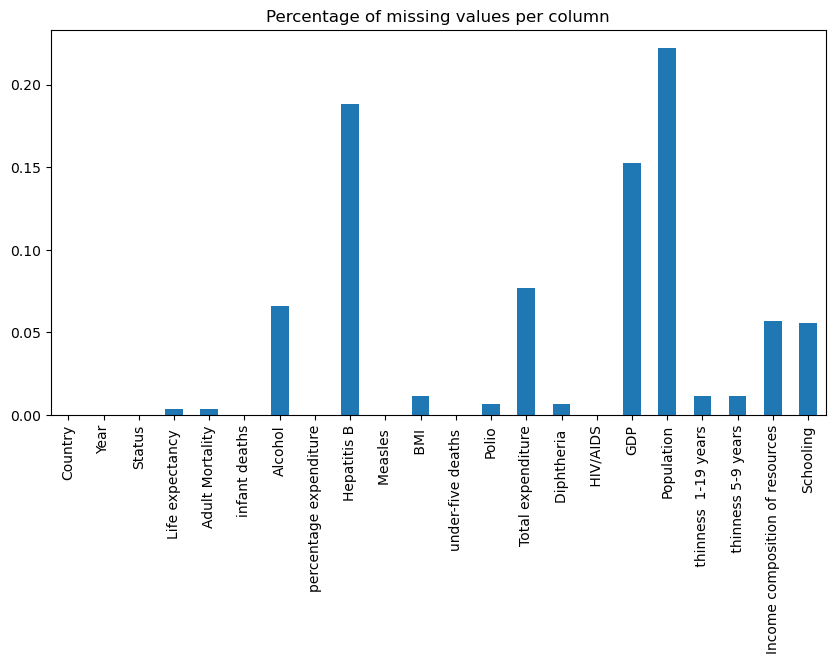

In [4]:
df.isna().sum(axis=0).apply(lambda x: x/len(df)).plot(kind = 'bar', figsize =(10,5))
plt.title('Percentage of missing values per column')
plt.show()

In [6]:
#Usunięcie wierszy z brakującymi danymi w kolumnie Population, do rozważań nie będą brane kolumny bez danych o populacji,
#brak zafałszowania danych, stanowi to mniejszy procent całej kolumny population
df_cleaned_Population_1 = df.dropna(axis = 0, subset = ['Population'])
df_cleaned_Population_1.isna().sum(axis = 0)


Country                              0
Year                                 0
Status                               0
Life expectancy                      2
Adult Mortality                      2
infant deaths                        0
Alcohol                            156
percentage expenditure               0
Hepatitis B                        482
Measles                              0
 BMI                                32
under-five deaths                    0
Polio                               19
Total expenditure                  155
Diphtheria                          19
 HIV/AIDS                            0
GDP                                 22
Population                           0
 thinness  1-19 years               32
 thinness 5-9 years                 32
Income composition of resources      1
Schooling                            0
dtype: int64

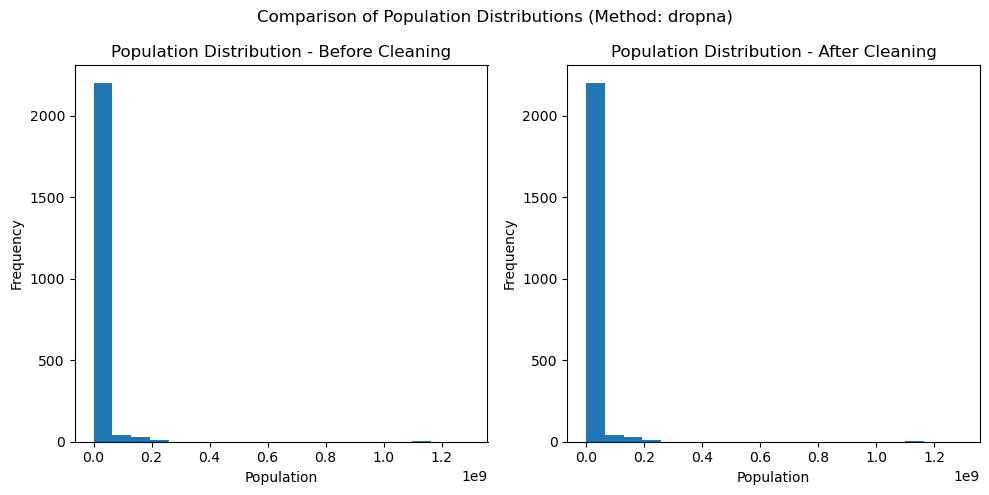

In [7]:
plt.figure(figsize = (10, 5))

plt.subplot(1 , 2, 1)
plt.hist(df["Population"], bins = 20)
plt.xlabel("Population")
plt.ylabel("Frequency")
plt.title("Population Distribution - Before Cleaning")

plt.subplot(1, 2, 2)
plt.hist(df_cleaned_Population_1["Population"],  bins = 20)
plt.xlabel("Population")
plt.ylabel("Frequency")
plt.title("Population Distribution - After Cleaning")

plt.suptitle("Comparison of Population Distributions (Method: dropna)")
plt.tight_layout()
plt.show()

In [9]:
#Wypenienie określoną wartością populacji (z 2021 roku) dla określonego kraju, rokład najbardziej prawdziwy
coutries_without_population = df[df['Population'].isna()]
country_names = coutries_without_population['Country'].unique().tolist()
print(country_names)

data_to_fill = {'Country': ['Antigua and Barbuda', 'Bahamas', 'Bahrain', 'Barbados', 'Bolivia (Plurinational State of)', 
                            'Brunei Darussalam', "Côte d'Ivoire", 'Congo', 'Cook Islands', 'Cuba', 'Czechia', 
                            "Democratic People's Republic of Korea", 'Democratic Republic of the Congo', 'Dominica', 
                            'Egypt', 'Eritrea', 'Gambia', 'Grenada', 'Iran (Islamic Republic of)', 'Kuwait', 'Kyrgyzstan', 
                            "Lao People's Democratic Republic", 'Libya', 'Marshall Islands', 'Micronesia (Federated States of)', 
                            'Monaco', 'Nauru', 'New Zealand', 'Niue', 'Oman', 'Qatar', 'Republic of Korea', 'Republic of Moldova',
                            'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'San Marino', 'Saudi Arabia', 
                            'Singapore', 'Slovakia', 'Somalia', 'The former Yugoslav republic of Macedonia', 'United Arab Emirates', 
                            'United Kingdom of Great Britain and Northern Ireland', 'United Republic of Tanzania', 
                            'United States of America', 'Venezuela (Bolivarian Republic of)', 'Viet Nam', 'Yemen'],
        
        'Population': [99000, 397000, 1493000, 287000, 11050000, 428000, 23695919, 4954674, 15200, 11221000, 10650000, 
                       25753000, 85026000, 74797, 91207000, 3213972, 5481000, 203850, 112000, 82801633, 4137309, 6309300,
                       6492400, 6278438, 57100, 543254, 26824, 113750, 4749598, 1626, 466000, 2639211, 82319724, 4051219,
                       56223, 182790, 11000, 1735000, 3341369, 5900000, 5421, 20554000, 5602100, 542134, 2083600, 9455800,
                       6678500, 10250000, 332915073, 32217943, 10175014, 29409000]}

population_dict = dict(zip(data_to_fill['Country'], data_to_fill['Population']))
filled_population = df['Population'].fillna(df['Country'].map(population_dict))
new_df = df[['Country', 'Hepatitis B', 'GDP']].copy()
new_df['filled_population'] = filled_population
new_df.isna().sum(axis = 0)

['Antigua and Barbuda', 'Bahamas', 'Bahrain', 'Barbados', 'Bolivia (Plurinational State of)', 'Brunei Darussalam', "Côte d'Ivoire", 'Congo', 'Cook Islands', 'Cuba', 'Czechia', "Democratic People's Republic of Korea", 'Democratic Republic of the Congo', 'Dominica', 'Egypt', 'Eritrea', 'Gambia', 'Grenada', 'Iran (Islamic Republic of)', 'Kuwait', 'Kyrgyzstan', "Lao People's Democratic Republic", 'Libya', 'Marshall Islands', 'Micronesia (Federated States of)', 'Monaco', 'Nauru', 'New Zealand', 'Niue', 'Oman', 'Qatar', 'Republic of Korea', 'Republic of Moldova', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'San Marino', 'Saudi Arabia', 'Singapore', 'Slovakia', 'Somalia', 'The former Yugoslav republic of Macedonia', 'United Arab Emirates', 'United Kingdom of Great Britain and Northern Ireland', 'United Republic of Tanzania', 'United States of America', 'Venezuela (Bolivarian Republic of)', 'Viet Nam', 'Yemen']


Country                0
Hepatitis B          553
GDP                  448
filled_population      0
dtype: int64

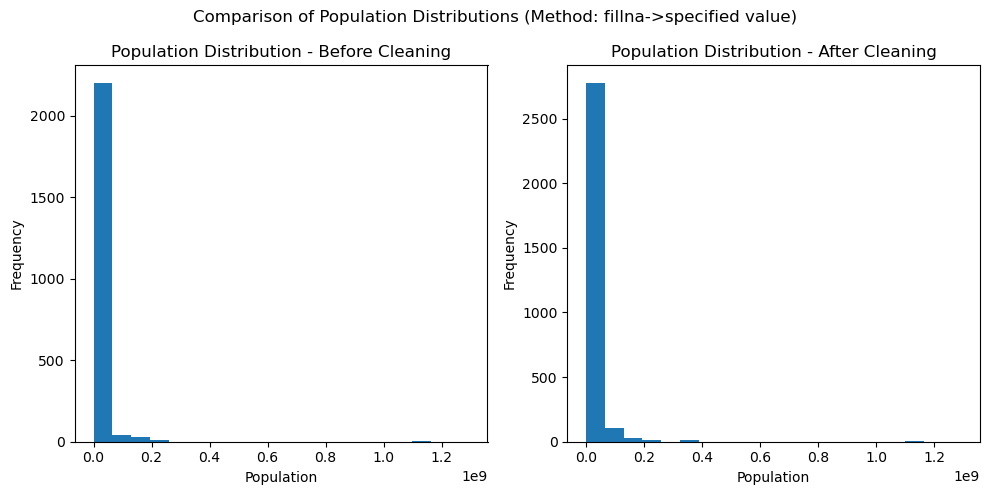

In [10]:
plt.figure(figsize = (10, 5))

plt.subplot(1 , 2, 1)
plt.hist(df['Population'], bins = 20)
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.title('Population Distribution - Before Cleaning')

plt.subplot(1, 2, 2)
plt.hist(new_df['filled_population'],  bins = 20)
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.title('Population Distribution - After Cleaning')

plt.suptitle('Comparison of Population Distributions (Method: fillna->specified value)')
plt.tight_layout()
plt.show()

In [11]:
#Uzupełnienie brakujących danych w kolumnie populacja wartością średnią ma minimalny wpływ na rozkład
mean_population = df['Population'].fillna(df['Population'].mean())
mean_population.isna().sum()
new_df2 = df[['Country', 'Hepatitis B', 'GDP']].copy()
new_df2['mean_population'] = mean_population

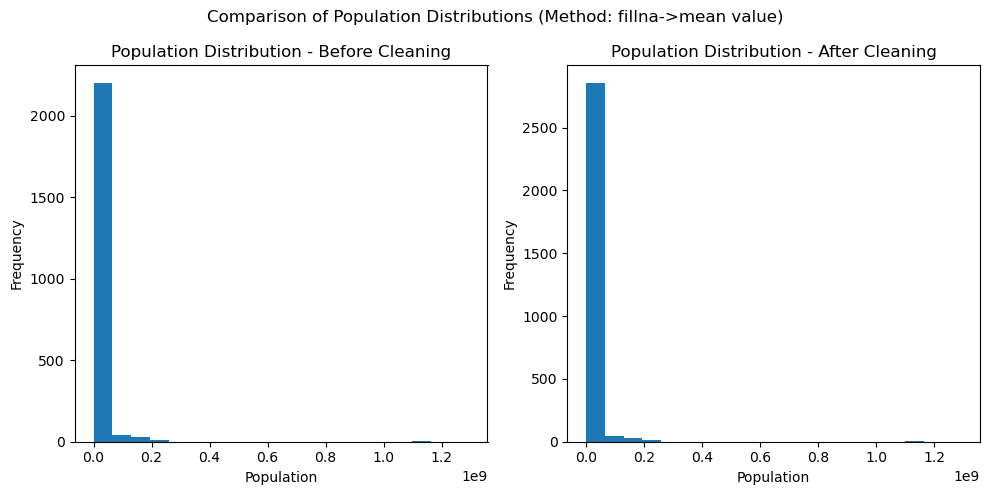

In [12]:
plt.figure(figsize = (10, 5))

plt.subplot(1 , 2, 1)
plt.hist(df['Population'], bins = 20)
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.title('Population Distribution - Before Cleaning')

plt.subplot(1, 2, 2)
plt.hist(new_df2['mean_population'],  bins = 20)
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.title('Population Distribution - After Cleaning')

plt.suptitle('Comparison of Population Distributions (Method: fillna->mean value)')
plt.tight_layout()
plt.show()

In [13]:
#Wypełnienie kolumny Hepatitis B metodą ffill, z powodu braku danych, głównie ze wczesnych lat

Hepatitis_B_ffill = df[['Hepatitis B']].fillna(method = 'ffill')

In [15]:
coutries_without_GDP = df[df['GDP'].isna()]
country_names_GDP = coutries_without_GDP['Country'].unique().tolist()
print(country_names_GDP)

data_to_fill2 = {
    'Country': [
        'Bahamas', 'Bolivia (Plurinational State of)', "Côte d'Ivoire", 'Congo', 'Cook Islands',
        'Czechia', "Democratic People's Republic of Korea", 'Democratic Republic of the Congo', 'Egypt',
        'Eritrea', 'Gambia', 'Iran (Islamic Republic of)', 'Iraq', 'Kyrgyzstan', "Lao People's Democratic Republic",
        'Libya', 'Micronesia (Federated States of)', 'Monaco', 'Niue', 'Papua New Guinea', 'Republic of Korea',
        'Republic of Moldova', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'San Marino',
        'Sao Tome and Principe', 'Slovakia', 'Somalia', 'South Sudan', 'Syrian Arab Republic',
        'The former Yugoslav republic of Macedonia', 'United Kingdom of Great Britain and Northern Ireland',
        'United Republic of Tanzania', 'United States of America', 'Venezuela (Bolivarian Republic of)', 'Viet Nam', 'Yemen'
],
    'GDP_per_capita': [
        31532, 3498, 1740, 817, 14822, 26809, 654, 481, 2601, 623, 557, 5149, 4120, 1304, 2911, 
        5791, 3573, 234317, 15620, 870, 33838, 2083, 13182, 8497, 7509, 50425, 693, 20853, 447, 275,
        925, 6540, 43620, 1080, 68309, 2324, 2632, 302
    ]
}

GDP_dict = dict(zip(data_to_fill2['Country'], data_to_fill2['GDP_per_capita']))
filled_GDP = df['GDP'].fillna(df['Country'].map(GDP_dict))

['Bahamas', 'Bolivia (Plurinational State of)', "Côte d'Ivoire", 'Congo', 'Cook Islands', 'Czechia', "Democratic People's Republic of Korea", 'Democratic Republic of the Congo', 'Egypt', 'Eritrea', 'Gambia', 'Iran (Islamic Republic of)', 'Iraq', 'Kyrgyzstan', "Lao People's Democratic Republic", 'Libya', 'Micronesia (Federated States of)', 'Monaco', 'Niue', 'Papua New Guinea', 'Republic of Korea', 'Republic of Moldova', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'San Marino', 'Sao Tome and Principe', 'Slovakia', 'Somalia', 'South Sudan', 'Syrian Arab Republic', 'The former Yugoslav republic of Macedonia', 'United Kingdom of Great Britain and Northern Ireland', 'United Republic of Tanzania', 'United States of America', 'Venezuela (Bolivarian Republic of)', 'Viet Nam', 'Yemen']


In [16]:
#całościowe wypełnienie kolumn, które były najbardziej obciążone brakiem danych
#dla kolumny Hepatitis B: medtoda ffill, dla kolumny GDP uzupełnienie określoną wartościa GDP z 2021 z "UNDATA",
#dla koluny population podobnie uzupełniono jak w przypadku GDP
pd.set_option('display.max_rows', None)
df_cleaned = df[['Country', 'Year']].copy()
df_cleaned['Hepatitis_B_ffill'] = Hepatitis_B_ffill
df_cleaned['filled_GDP'] = filled_GDP
df_cleaned['filled_population'] = filled_population

In [17]:
#poniższe kraje, to kraje rozwinięte w których Hepatitis B było puste dla każdego badanego roku, 
#zatem lepiej będzie użyć założonej dla tych krajów wartości 95 niż korzystać z metody ffill
country_developed_Hepatitis_B = ['Denmark', 'Finland', 'Hungary', 'Iceland', 'Japan', 'Norway', 'Slovenia', 'Switzerland',
                                 'United Kingdom of Great Britain and Northern Ireland']

for country in country_developed_Hepatitis_B:
     df_cleaned.loc[df_cleaned['Country'] == country, 'Hepatitis_B_ffill'] = 95.0

df_cleaned

,Country,Year,Hepatitis_B_ffill,filled_GDP,filled_population
0,Afghanistan,2015,65.0,584.259210,3.373649e+07
1,Afghanistan,2014,62.0,612.696514,3.275820e+05
2,Afghanistan,2013,64.0,631.744976,3.173169e+07
3,Afghanistan,2012,67.0,669.959000,3.696958e+06
4,Afghanistan,2011,68.0,63.537231,2.978599e+06
5,Afghanistan,2010,66.0,553.328940,2.883167e+06
6,Afghanistan,2009,63.0,445.893298,2.843310e+05
7,Afghanistan,2008,64.0,373.361116,2.729431e+06
8,Afghanistan,2007,63.0,369.835796,2.661679e+07
9,Afghanistan,2006,64.0,272.563770,2.589345e+06


In [ ]:
#tu tylko sprawdzenie jakie kraje miały NaN dla Hepatitis B dla wszystkich lat, czyli 2000-2015
df_clean = df[['Country', 'Year', 'Hepatitis B', 'GDP', 'Population']].copy()
df_clean[df_clean['Hepatitis B'].isna()]